In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [31]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### lets explore the data

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Part A: Visualizations


## 1. For the "Median value of owner-occupied homes" provide a boxplot

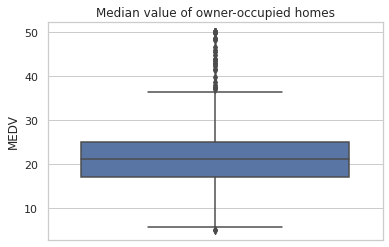

In [19]:
sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

## 2. Provide a bar plot for the Charles river variable

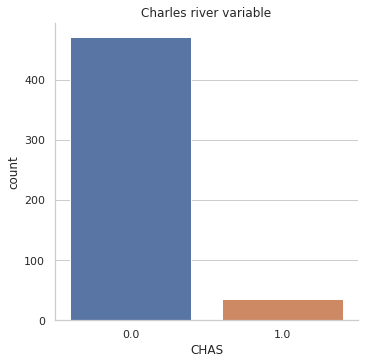

In [14]:

ax=sns.catplot(x='CHAS',kind='count',data=boston_df)
plt.title("Charles river variable")
plt.show()

## 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df.loc[boston_df['AGE']<=35, 'AgeGroup'] = '35 and Lower'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'AgeGroup'] = '35 to 70'
boston_df.loc[boston_df['AGE']>=70, 'AgeGroup'] = '70 and Higher'

Text(0.5, 1.0, 'Box Plot for Median value of owner-occupied homes(MEDV) and Age Groups')

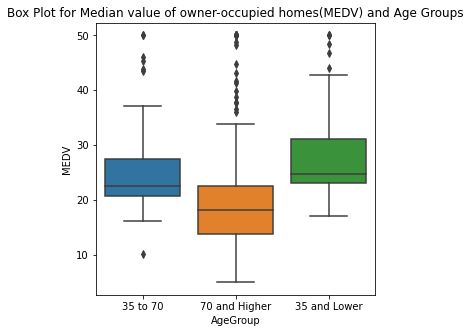

In [10]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df)
plt.title("Box Plot for Median value of owner-occupied homes(MEDV) and Age Groups")

## 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

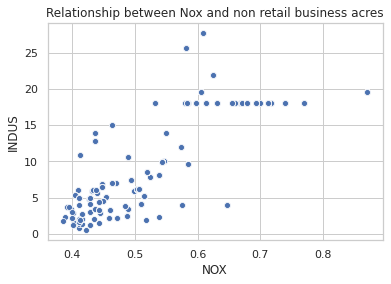

In [20]:
ax=sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
plt.title("Relationship between Nox and non retail business acres")
plt.show()

## 5. Create a histogram for the pupil to teacher ratio variable

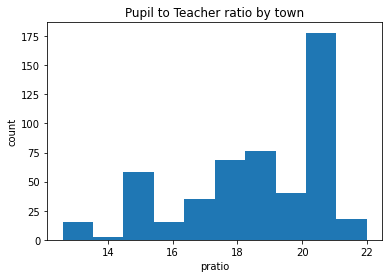

In [29]:
plt.hist(boston_df['PTRATIO'])
plt.title("Pupil to Teacher ratio by town")
plt.xlabel("pratio")
plt.ylabel("count")
plt.show()

# Part B: Hypothesis testing methodologies


## 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### **Hypothesis:**
  * Null Hypothesis (Ho): There is no difference in median value of houses bounded by Charles River
  
  * Alternative Hypothesis (Ha) = There is a signicant difference in the median values

    *let α = 0.05

In [5]:
# We will use the Levene's test to heck the significance

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [6]:
# Now we perform the T-test

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**As the P-Value for the T-test is less than 0.05 then we reject the Null Hypothesis and conclude that there is not enough evidence to support equal median values of houses bounded by Charles River. Therefore the Medians values are significantly different.**

## 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### **Hypothesis:**
   * Ho = There is no difference in median values of houses in the three age gropus
  
   * Ha = There is a atleast one difference in the meadian values

    *let α = 0.05

In [12]:
thirtyfivelesser = boston_df[boston_df['AgeGroup']=='35 and Lower']['MEDV']
thirtyfivetoseventy = boston_df[boston_df['AgeGroup']=='35 to 70']['MEDV']
seventy_over = boston_df[boston_df['AgeGroup']=='70 and Higher']['MEDV']

In [13]:
# Check the equality of variances using Levene's test

scipy.stats.levene(thirtyfivelesser, thirtyfivetoseventy, seventy_over, center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [15]:
# Let us now run the One-Way ANOVA test

scipy.stats.f_oneway(thirtyfivelesser, thirtyfivetoseventy, seventy_over)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**The Pvalue of the one-way Anova test is below the significance level. Therefore we reject the null hypothesis as there's enough evidence that there is a difference in median values of houses for each proportion owner occupied  units prior to 1940**

## 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### **Hypothesis:**
  * Ho = There is no relationship between NO concentrations and the proportion of non retail business acres per town
  
  * Ha = There is a some relationship between NO conc and proportion per town

    *let α = 0.05

In [22]:
#Perfom the Pearson correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

**We reject the null hypothesis as the Pvalue is lower than the significance level, This shows that there is some relationship Nitric oxide concentration and proprtion of business acres per town**

## 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### **Hypothesis:**
  * Ho = There is no impact of additional weighted distance
  
  * Ha = There is an impact off additional weighted distance to Boston employment centres

    *let α = 0.05

In [27]:
X = boston_df['DIS'] # DIS is the independent variable
y = boston_df['MEDV'] # MEDV is the dependent

# Add an intercept to our model as Y = aX +b
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.21e-08
Time:                        12:15:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**The P-Value is lower than 0.05 then we reject the Null and conclude that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.**